# Orbit Integration

### Github repo: https://github.com/arturcp

Orbit integration, or orbit modeling, is a simulation of the trajectory of a celestial body, knowing the current parameters and the physics that are applied in such context. It is the process of creating mathematical models to simulate motion of a massive body as it moves in orbit around another massive body due to gravity. Other forces such as gravitational attraction from tertiary bodies, air resistance, solar pressure, or thrust from a propulsion system are typically modeled as secondary effects. Directly modeling an orbit can push the limits of machine precision due to the need to model small perturbations to very large orbits. Because of this, perturbation methods are often used to model the orbit in order to achieve better accuracy.

In most stellar systems, orbits cannot be computed analytically, so effective algorithms for numerical orbit integration are among the most important tools for stellar dynamics.

The best integrator to use for a given problem is determined by several factors:
    
* How smooth is the potential? The exploration of orbits in an analytic model of a galaxy potential places fewer demands on the integrator than following orbits in an open cluster, where the stars are buffeted by close encounters with their neighbors.
* How cheaply can we evaluate the gravitational field? 
* How much memory is available? The most accurate integrators use the position and velocity of a particle at several previous timesteps to help predict its future position. When simulating a star cluster, plenty of memory should be available to store this information. In a simulation of galaxy dynamics or a cosmological simulation, however, it is important to use as many particles as possible, so memory is an important constraint. Thus for such simulations the optimal integrator predicts the future phase-space position using only the current position and gravitational field.
* How long will the integration run? 

If you want to take a glimpse at the orbit integration methods, [this is a good place to start](http://www.dem.inpe.br/~hkk/Cursos/Sat_art-HKK.pdf). You will see in the code that we used the `RungeKutta`.

There is also a [nice chapter about it here](https://pantheon.ufrj.br/bitstream/11422/4587/1/864699.pdf)

## Let's start

Now, let's dive into the code. 

First of all, we have to tell the Jupiter Notebook to render our graphs. In order to do that, we use one of what is known as magic functions

From the docs:

`%matplotlib inline` sets the backend of matplotlib to the 'inline' backend.

With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

So, here we go:

In [37]:
%matplotlib inline

It is time to import some libraries:

In [38]:
from galpy import potential
from galpy.orbit import Orbit
from astropy import units
import matplotlib.pyplot as plot
import numpy


## The potencial

We are using the [Logarithm potential](https://galpy.readthedocs.io/en/v1.4.0/reference/potentialloghalo.html). We chose this potential because it was the simplest one, that gave us the desired rotation curve for our Galaxy.

In [39]:
lhp = potential.LogarithmicHaloPotential()

There are other potentials you can use:

* [MiyamotoNagaiPotential](https://galpy.readthedocs.io/en/v1.4.0/reference/potentialmiyamoto.html)
* [NFWPotential](https://galpy.readthedocs.io/en/v1.4.0/reference/potentialnfw.html)
* [HernquistPotential](https://galpy.readthedocs.io/en/v1.4.0/reference/potentialhernquist.html)

There are so many others. Study them to find out which one works best for you.

In [40]:
# The age of the star or cluster. This data can be retrieved from the catalog.
age = 10.0

# `linspace` creates an equally spaced array. In this case, the first element is 0 (first parameter) 
# and the last is age (second parameter). 1000 is the number of samples inside the given interval.
#
# ts will store the result and the unit of each element is gigayears
ts = numpy.linspace(0., age, 1000)*units.Gyr

# Here, we create an orbit. The parameters are:
#
# vxvv: relative initial conditions. The items are, in order:  distance from the center of the  
#       Galaxy (R), radial velocity (vR), transverse velocity (vT), distance to the galactic plane 
#       (z, the coordinate in the z axis), component of velocity perpendicular to the galactic 
#       plane (vz) and the angle Sun-galactic center-object (phi).
# ro: distance between the Sun and the center of the Galaxy (in kpc). 
# vo: Sun's rotation velocity around the Galaxy (in km/s).
#
#                  R     vR    vT    z    vz   phi
op_corotation = Orbit(vxvv=[0.95, 0.04 , 1.1 , 0. , 0.0 , 0. ], ro=8., vo=230.) 
op_not_corotation = Orbit(vxvv=[1.1, 0.04 , 0.5 , 0. , 0.0 , 0. ], ro=8., vo=230.) 



In [41]:
def plot_figure(op):
    # Time to do the magic trick. We integrate in ts using the logarithmic halo potential. The `rk6_c` means we 
    # used the Runge Kutta method (order 6).
    op.integrate(ts, lhp, method='rk6_c')

    # plot the chart.
    op.plot(d1='x', d2='y') 
    plot.xlim(-10, 10)
    plot.ylim(-10, 10)

    # get current figure
    fig = plot.gcf()
    fig.set_size_inches(10., 10.)    

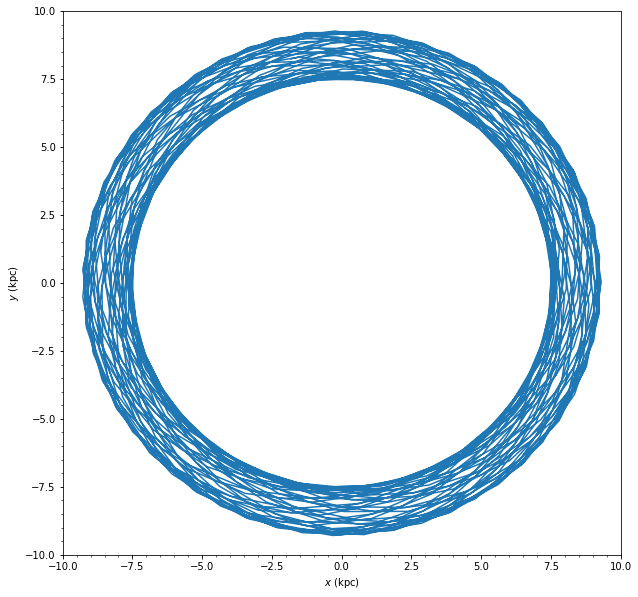

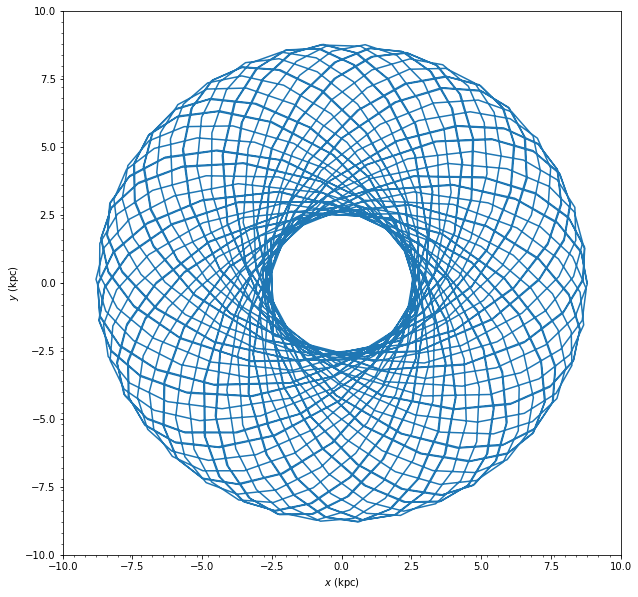

In [42]:
plot_figure(op_corotation)
plot_figure(op_not_corotation)

Well, the static image is boring. Let's animate things a little bit:

In [45]:
op_corotation.animate(d1='x', d2='y', width=600, height=600)

In [46]:
op_not_corotation.animate(d1='x', d2='y', width=600, height=600)
